<a href="https://colab.research.google.com/github/NguyenNgocBaoNgan/ML_20130331_NguyenNgocBaoNgan/blob/main/Lab_7_20130331_NguyenNgocBaoNgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# CROSS VALIDATION
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
data = datasets.load_iris()
X = data['data']
y = data['target']

Xtrain,Xtest, ytrain,ytest = train_test_split(X, y,test_size=0.3, random_state=0)

In [ ]:
clf = svm.SVC(kernel='sigmoid',random_state=0) 
scores = cross_validate(clf,X,y,scoring='accuracy',cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))


['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
X.shape  #in so mau du lieu, tong so thuoc tinh
X_new = SelectKBest(chi2, k=2).fit_transform(X,y)
X_new.shape #sau khi scale

#Create a Random Forest Classifier
clf_rf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
scores_acc = cross_validate(clf_rf,X_new,y,scoring='accuracy',cv=10)
# scores_pre = cross_validate(clf_rf,X,y,scoring='precision_macro',cv=10)
# scores_recall = cross_validate(clf_rf,X,y,scoring='recall_macro',cv=10)
# scores_f1 = cross_validate(clf_rf,X,y,scoring='f1_macro',cv=10)

print(sorted(scores_acc.keys()))
print(np.mean(scores_acc['test_score']))

['fit_time', 'score_time', 'test_score']
0.9666666666666666


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [ ]:
# code
mnist = datasets.load_digits()
X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

In [ ]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
  #print(mask)
    labels[mask] = mode(mnist.target[mask])[0]
  #print(labels[mask])
print("accuracy:",accuracy_score(mnist.target, labels))
print("precision:",precision_score(mnist.target, labels, average='macro'))
print("f1:",f1_score(mnist.target, labels, average='macro'))
print("recall:",recall_score(mnist.target, labels, average='macro'))

accuracy: 0.7935447968836951
precision: 0.8049510946090495
f1: 0.7899801068577756
recall: 0.7935735538874538


<ipython-input-6-308f25cde69e>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# code
# Random Forest
clf_rf = svm.SVC(kernel='sigmoid',random_state=0) 
scores_acc_rf = cross_validate(clf_rf,X,y,scoring='accuracy',cv=10)
scores_pre_rf = cross_validate(clf_rf,X,y,scoring='precision_macro',cv=10)
scores_recall_rf = cross_validate(clf_rf,X,y,scoring='recall_macro',cv=10)
scores_f1_rf = cross_validate(clf_rf,X,y,scoring='f1_macro',cv=10)
# print(sorted(scores.keys()))
# print(np.mean(scores['test_score']))

# kNN
knn = KNeighborsClassifier(n_neighbors=5)
scores_acc_knn = cross_validate(knn,X,y,scoring='accuracy',cv=10)
scores_pre_knn = cross_validate(knn,X,y,scoring='precision_macro',cv=10)
scores_recall_knn = cross_validate(knn,X,y,scoring='recall_macro',cv=10)
scores_f1_knn = cross_validate(knn,X,y,scoring='f1_macro',cv=10)

# Naïve Bayes
nb = GaussianNB()
scores_acc_nb = cross_validate(nb,X,y,scoring='accuracy',cv=10)
scores_pre_nb = cross_validate(nb,X,y,scoring='precision_macro',cv=10)
scores_recall_nb = cross_validate(nb,X,y,scoring='recall_macro',cv=10)
scores_f1_nb = cross_validate(nb,X,y,scoring='f1_macro',cv=10)


In [ ]:
t= PrettyTable(['','acc','pre','recall','f1'])


t.add_row(['Random Forest', np.mean(scores_acc_rf['test_score']),np.mean(scores_pre_rf['test_score']),np.mean(scores_recall_rf['test_score']),np.mean(scores_f1_rf['test_score'])])
t.add_row(['kNN', np.mean(scores_acc_knn['test_score']),np.mean(scores_pre_knn['test_score']),np.mean(scores_recall_knn['test_score']),np.mean(scores_f1_knn['test_score'])])
t.add_row(['Naive Bayes', np.mean(scores_acc_nb['test_score']),np.mean(scores_pre_nb['test_score']),np.mean(scores_recall_nb['test_score']),np.mean(scores_f1_nb['test_score'])])
print(t)

+---------------+--------------------+--------------------+--------------------+--------------------+
|               |        acc         |        pre         |       recall       |         f1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
| Random Forest | 0.8848013656114215 | 0.9011564046683042 | 0.8847832817337462 | 0.8857254060485733 |
|      kNN      | 0.9716294227188081 | 0.9745645728626379 | 0.9715187478500174 | 0.9715505814420695 |
|  Naive Bayes  | 0.8113904407200497 | 0.8480837289405493 | 0.8114189886480908 | 0.8090382615408214 |
+---------------+--------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
# from the obtained results, supervised learning is better

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [ ]:
#code
# import dataset
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/Lab7'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/Lab7


In [ ]:
ds = pd.read_csv("shopping-data.csv")
column_drop =['CustomerID','Genre']
ds.drop(column_drop, axis=1, inplace=True)

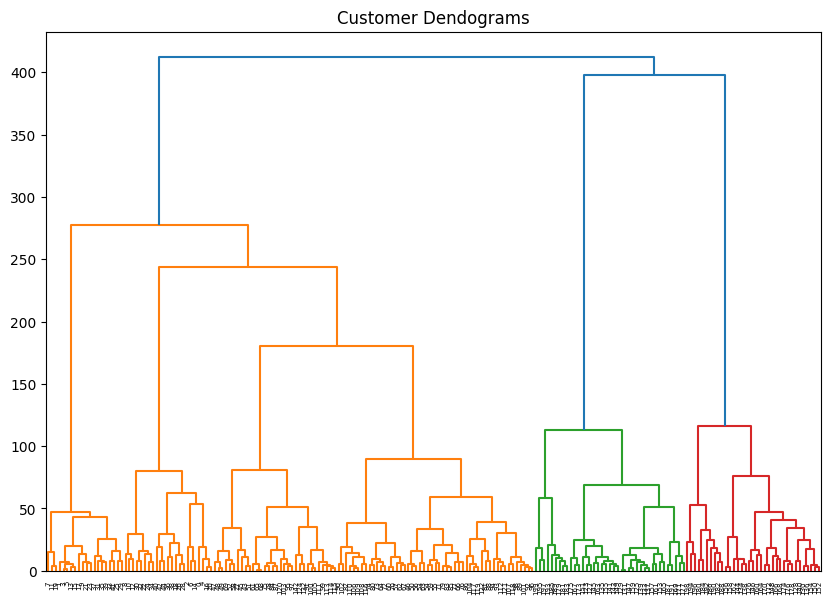

In [ ]:
# temp = hierarchy.linkage(ds, 'single')
# plt.figure()
 
# dn = hierarchy.dendrogram(
#     temp, above_threshold_color="green", color_threshold=.7)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(ds, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [ ]:
#code
kmeans_1 = KMeans(n_clusters = 3, random_state = 0)
kmeans_1.fit(ds)
clusters = kmeans.predict(ds)
kmeans_1.cluster_centers_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(3, 3)

In [ ]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [ ]:
sse = []
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]
# for k in range(2, 10):
#   kmeans_1 = KMeans(n_clusters=k, random_state = 0)
#   kmeans_1.fit(scaled_features)
#   sse.append(kmeans_1.inertia_)
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

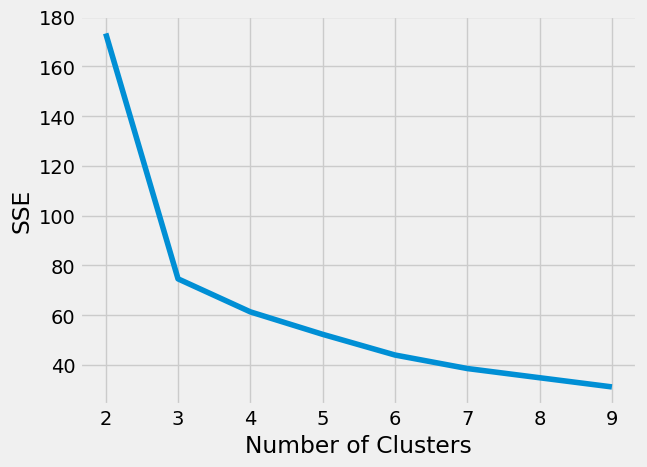

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(2, 10), sse)
 plt.xticks(range(2, 10))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code
# features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
# X = ds[features]

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(ds)
cluster.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#Finally,
Save a copy in your Github. Remember renaming the notebook.